c:\Users\mahip\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
c:\Users\mahip\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\mahip\AppData\Local\Temp/ipykernel_23636/15459385.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period_data['Fit_Line'] = model.predict(X)  # Predicted values for the regression line
c:\Users\mahip\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a futur

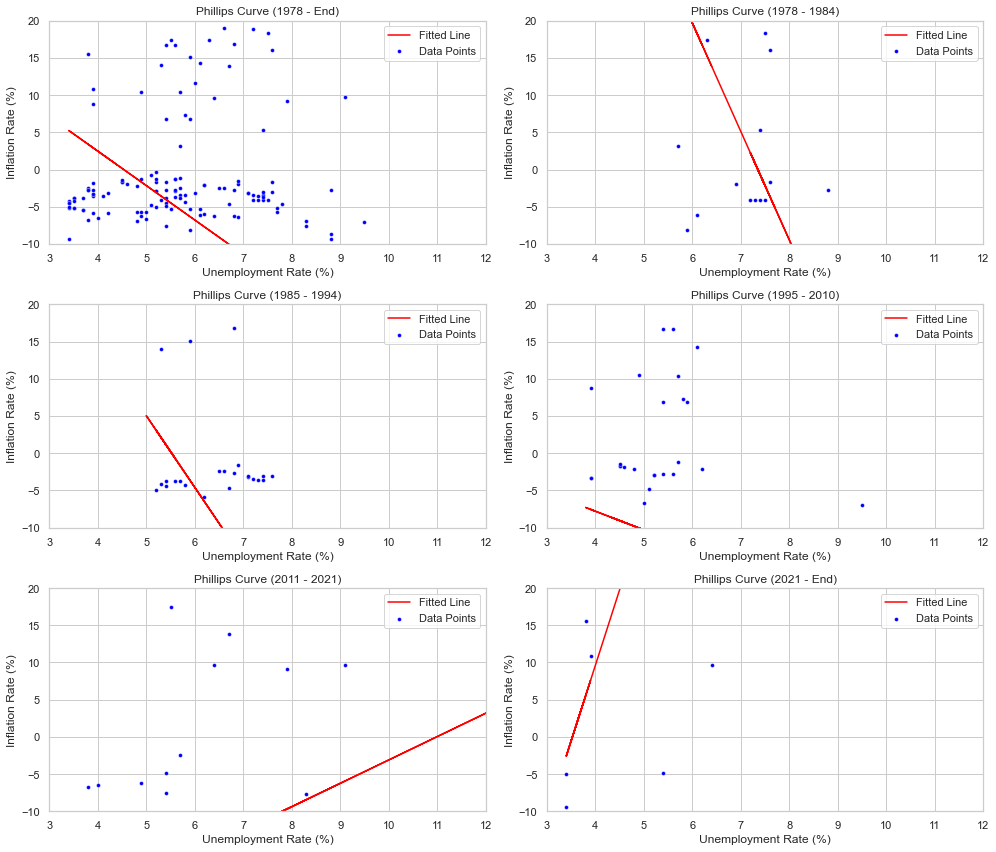

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

# Load the datasets (assuming files are already loaded)
unemployment = pd.read_csv('UNRATE.csv', parse_dates=['DATE'])
cpi = pd.read_csv('CPI.csv', parse_dates=['DATE'])

# Merge datasets on the DATE column to align unemployment and CPI data
data = pd.merge(unemployment, cpi, on='DATE', how='inner')

# Rename columns for easier access
data.columns = ['DATE', 'UNRATE', 'CPI']

# Calculate year-over-year inflation as ((CPI_t - CPI_(t-12)) / CPI_(t-12)) * 100
data['Inflation'] = data['CPI'].pct_change(periods=12) * 100

# Drop rows with NaN values in the Inflation column (first 12 months will be NaN)
data.dropna(subset=['Inflation'], inplace=True)

# Filter out extreme inflation values (e.g., above 100% or below -100%) to focus on reasonable data
data = data[(data['Inflation'] < 100) & (data['Inflation'] > -100)]

# Define time periods
time_periods = {
    "1978 - End": data,
    "1978 - 1984": data[(data['DATE'] >= '1978-01-01') & (data['DATE'] <= '1984-12-31')],
    "1985 - 1994": data[(data['DATE'] >= '1985-01-01') & (data['DATE'] <= '1994-12-31')],
    "1995 - 2010": data[(data['DATE'] >= '1995-01-01') & (data['DATE'] <= '2010-12-31')],
    "2011 - 2021": data[(data['DATE'] >= '2011-01-01') & (data['DATE'] <= '2021-12-31')],
    "2021 - End": data[(data['DATE'] >= '2021-01-01')]
}

# Set up the plotting
plt.figure(figsize=(14, 12))
sns.set(style="whitegrid")

# Plot Phillips Curve for each time period with individual fits
for i, (label, period_data) in enumerate(time_periods.items(), 1):
    plt.subplot(3, 2, i)
    
    # Scatter plot of Unemployment vs. Inflation
    sns.scatterplot(x=period_data['UNRATE'], y=period_data['Inflation'], color="blue", s=15, label='Data Points')
    
    # Fit linear regression model for the Phillips Curve
    X = sm.add_constant(period_data['UNRATE'])  # Add a constant for the intercept
    model = sm.OLS(period_data['Inflation'], X).fit()
    period_data['Fit_Line'] = model.predict(X)  # Predicted values for the regression line
    
    # Plot the regression line
    plt.plot(period_data['UNRATE'], period_data['Fit_Line'], color='red', linewidth=1.5, label='Fitted Line')
    
    # Setting limits to focus on relevant range
    plt.ylim(-10, 20)  # Set y-axis limit based on typical inflation rates
    plt.xlim(3, 12)    # Set x-axis limit based on typical unemployment rates
    
    # Labels and Title
    plt.title(f'Phillips Curve ({label})')
    plt.xlabel('Unemployment Rate (%)')
    plt.ylabel('Inflation Rate (%)')
    plt.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()
